In [1]:
#Padigela Srinithya Reddy
#BLEN.U4CSE21146

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dt = pd.read_csv("Skin_Cancer_Metadata.csv")
dt

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
feat = dt[['age', 'sex', 'localization']]

In [6]:
feat = pd.get_dummies(feat)

In [7]:
imputer = SimpleImputer(strategy='mean') 
feat_imputed = pd.DataFrame(imputer.fit_transform(feat), columns=feat.columns)

In [8]:
scaler = StandardScaler()
feat_standardized = scaler.fit_transform(feat_imputed)

In [10]:
k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(feat_standardized)

C:\Users\srini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
dt['cluster'] = clusters


In [20]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [21]:
from scipy.spatial.distance import cdist


In [22]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


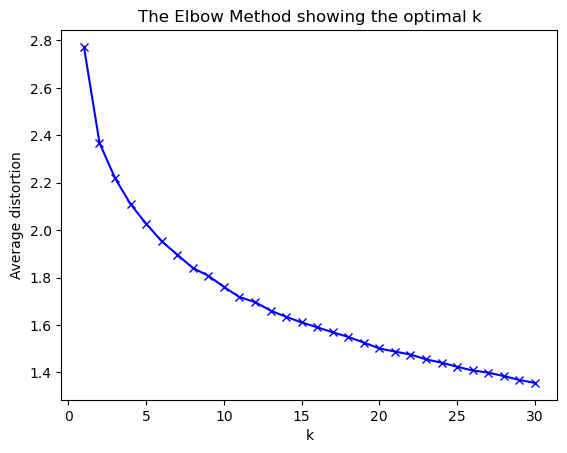

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

numeric_dt = dt.select_dtypes(include=[np.number])

label_encoder = LabelEncoder()
for column in dt.select_dtypes(include=['object']).columns:
    dt[column] = label_encoder.fit_transform(dt[column])

imputer = SimpleImputer(strategy='mean')
dt_imputed = pd.DataFrame(imputer.fit_transform(dt), columns=dt.columns)

scaler = StandardScaler()
dt_standardized = scaler.fit_transform(dt_imputed)

k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(dt_standardized)

dt['cluster'] = clusters

distortions = []
K = range(1, 31)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dt_standardized)
    distortions.append(sum(np.min(cdist(dt_standardized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dt_standardized.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(feat_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()
